In [2]:
from tratamento_dados import db_hotel;
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report#não precisa sagemaker
from sklearn.model_selection import train_test_split # não precisa sagemaker
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Separando as variáveis para treinamento x teste // X = dados e y = resultado
X = db_hotel.drop('label_avg_price_per_room', axis=1)
y = db_hotel['label_avg_price_per_room']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #30% para teste e 70% para treinamento


In [12]:
# Modelo original (sem balanceamento)
model_original = XGBClassifier(objective='multi:softmax')
model_original.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', ...)

In [13]:
y_pred_original = model_original.predict(X_test)
print("Original (sem balanceamento):")
print(classification_report(y_test, y_pred_original))

Original (sem balanceamento):
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3288
           1       0.80      0.81      0.81      4085
           2       0.87      0.89      0.88      3510

    accuracy                           0.84     10883
   macro avg       0.85      0.84      0.84     10883
weighted avg       0.84      0.84      0.84     10883



# Oversampling com smote

In [14]:
# Oversampling com SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
model_over = XGBClassifier(objective='multi:softmax')
model_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', ...)

In [19]:
y_pred_over = model_over.predict(X_test)
print("Oversampling com SMOTE:")
print(classification_report(y_test, y_pred_over))

Oversampling com SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      3288
           1       0.81      0.80      0.80      4085
           2       0.86      0.89      0.87      3510

    accuracy                           0.84     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.84      0.84      0.84     10883



# Undersampling com RandomUnderSampler

In [16]:
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
model_under = XGBClassifier(objective='multi:softmax')
model_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', ...)

In [20]:
y_pred_under = model_under.predict(X_test)
print("Undersampling com RandomUnderSampler:")
print(classification_report(y_test, y_pred_under))

Undersampling com RandomUnderSampler:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3288
           1       0.81      0.77      0.79      4085
           2       0.85      0.89      0.87      3510

    accuracy                           0.83     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.83      0.83      0.83     10883



# Plot 3

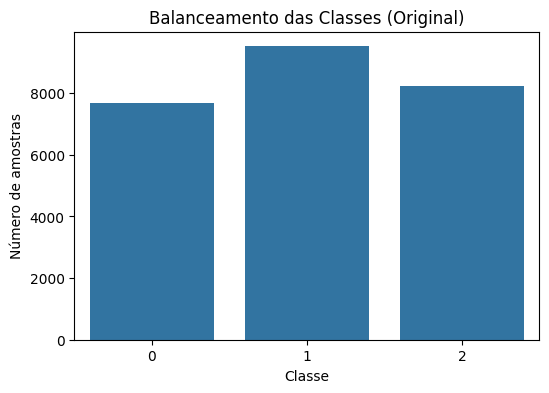

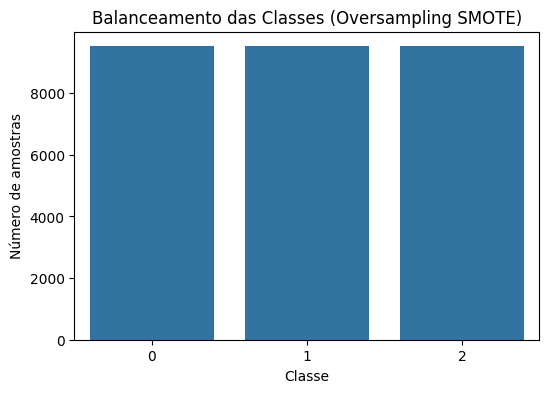

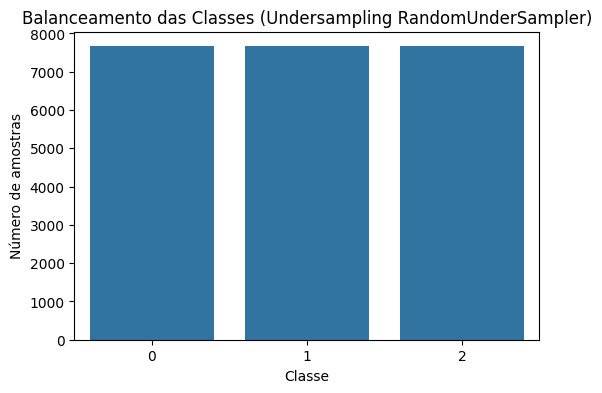

In [21]:
def plot_class_distribution(y, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Classe")
    plt.ylabel("Número de amostras")
    plt.show()

# Plot para o conjunto original
plot_class_distribution(y_train, "Balanceamento das Classes (Original)")

# Plot para o conjunto após oversampling com SMOTE
plot_class_distribution(y_train_over, "Balanceamento das Classes (Oversampling SMOTE)")

# Plot para o conjunto após undersampling com RandomUnderSampler
plot_class_distribution(y_train_under, "Balanceamento das Classes (Undersampling RandomUnderSampler)")